In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import pickle
import xgboost as xgb 
import lightgbm as lgb 

In [88]:
def print_confusion_matrix(test_y, predictions):
    cm = confusion_matrix(test_y, predictions)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()
    target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5']
    print(classification_report(test_y, predictions, target_names=target_names))
    acc = accuracy_score(test_y, predictions)
    return auc

In [4]:
with open('../dataset/train.data.pkl','rb') as f:
    train_data = pickle.load(f)

In [ ]:
del train_data['uId']

In [7]:
print(train_data.info())
train_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1594068 entries, 0 to 1594067
Columns: 633 entries, gender to age_group
dtypes: float32(191), uint8(442)
memory usage: 1.8 GB
None


,gender,prodName_p001,prodName_p0010,prodName_p00100,prodName_p00102,prodName_p00103,prodName_p00105,prodName_p00106,prodName_p00107,prodName_p00108,...,weekdayDurationSum_d,weekdayDurationSum_e,weekdayDurationSum_f,weekendDurationSum_a,weekendDurationSum_b,weekendDurationSum_c,weekendDurationSum_d,weekendDurationSum_e,weekendDurationSum_f,age_group
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4


In [8]:
train, test = train_test_split(train_data, test_size = 0.01, random_state= 2019)

In [10]:
train.shape,test.shape,train_data.shape

((1578127, 633), (15941, 633), (1594068, 633))

In [11]:
train_y = train.age_group
test_y = test.age_group
train_x = train.drop(['age_group'], axis = 1)
test_x = test.drop(['age_group'], axis = 1)

In [12]:
train_y.shape,train_x.shape

((1578127,), (1578127, 632))

https://www.cnblogs.com/wzdLY/p/9867719.html  
https://lightgbm.readthedocs.io/en/latest/Python-API.html#scikit-learn-api

In [22]:
params = {
          'max_depth' : -1,
          'nthread': -1, # Updated from nthread
          'num_leaves': 64,
          'learning_rate': 0.05,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 6,
          }

In [25]:
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'multiclass',
          n_jobs = -1, # Updated from 'nthread'
          silent = True,
#           max_depth = params['max_depth'],
#           max_bin = params['max_bin'],
#           subsample_for_bin = params['subsample_for_bin'],
#           subsample = params['subsample'],
#           subsample_freq = params['subsample_freq'],
#           min_split_gain = params['min_split_gain'],
#           min_child_weight = params['min_child_weight'],
#           min_child_samples = params['min_child_samples'],
#           scale_pos_weight = params['scale_pos_weight']
                        )
mdl.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq'])

In [26]:
gridParams = {
#     'learning_rate': [1,0.1,0.01],
    'n_estimators': [64,128,256],
#     'num_leaves': [50,100,150,200,250,300],
#     'colsample_bytree' : [1,0.8,0.6],
#     'subsample' : [1,0.8,0.6],
#     'reg_alpha' : [10,3,1, 0.1],
#     'reg_lambda' : [10,3,1, 0.1],
    }

In [27]:
grid = GridSearchCV(mdl, gridParams, verbose=1, cv=4, n_jobs=-1, scoring='accuracy')
grid.fit(test_x, test_y)

print(grid.best_params_)
print(grid.best_score_)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:   41.2s remaining:  3.4min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.2min finished


{'n_estimators': 128}
0.5264412521171821


/home/haha/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Overall accuracy of Logistic Regression model: 0.6000878238504486


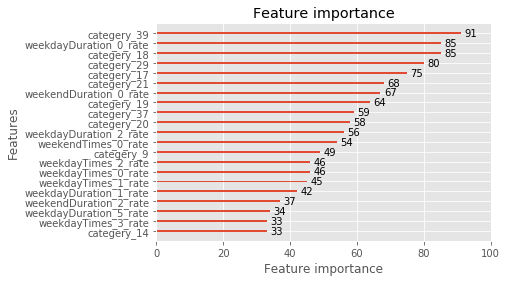

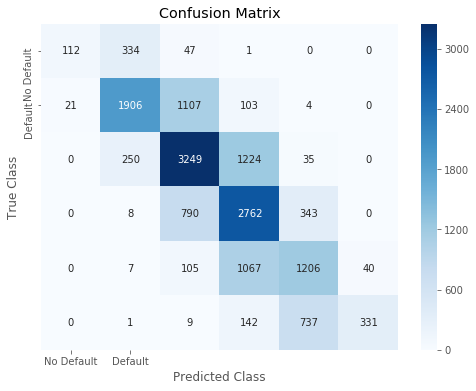

              precision    recall  f1-score   support

     class 0       0.84      0.23      0.36       494
     class 1       0.76      0.61      0.68      3141
     class 2       0.61      0.68      0.65      4758
     class 3       0.52      0.71      0.60      3903
     class 4       0.52      0.50      0.51      2425
     class 5       0.89      0.27      0.42      1220

   micro avg       0.60      0.60      0.60     15941
   macro avg       0.69      0.50      0.53     15941
weighted avg       0.63      0.60      0.59     15941



<function sklearn.metrics.ranking.auc(x, y, reorder='deprecated')>

In [94]:
%matplotlib inline
best_p = {'n_estimators': 128}

lgbm = lgb.train(best_p, lgb.Dataset(test_x,label=test_y))

predictions_lgbm_prob = lgbm.predict(test_x)
predictions_lgbm_01 = [round(each) for each in predictions_lgbm_prob]

acc_logit = accuracy_score(test_y, predictions_lgbm_01)
print('Overall accuracy of Logistic Regression model:', acc_logit)

lgb.plot_importance(lgbm, max_num_features=21, importance_type='split')
print_confusion_matrix(test_y, predictions_lgbm_01)

In [61]:
y_pred = lgbm.predict(test_x, pred_leaf=True)
print(y_pred.shape)
num_leaf = max([max(each) for each in y_pred])+1
num_leaf

(15941, 128)


31

In [62]:
y_pred[0]

array([22,  3, 10,  3,  8, 18, 12, 25,  7,  2, 18, 26,  1, 20, 19, 10, 24,
        4,  7, 10, 20, 15, 12,  2,  0, 12,  5, 23, 18, 13, 11,  9, 11,  1,
       15,  7,  9,  3,  7, 17, 29, 10, 30, 15, 14, 30, 17, 28,  3,  8,  1,
       21, 20,  2,  6,  0, 18,  3,  2, 11, 28,  6, 20,  6,  3,  0,  2, 11,
        6, 11,  5, 16, 24, 15,  5,  0, 10,  0, 16,  5, 29,  1,  0,  5,  0,
        0,  0, 14, 28, 15,  0,  0,  0,  0, 10, 16, 20, 22, 21,  8,  9, 27,
       30, 27, 14,  0,  0, 28, 14,  6,  0,  0,  0,  6,  0, 29,  0,  0,  0,
        0,  0, 10,  0,  0,  0,  0,  0, 12], dtype=int32)

In [63]:
print('Writing transformed training data')
# num_leaf = grid.best_params_['num_leaves']
transformed_training_matrix = np.zeros([len(y_pred), len(y_pred[0]) * num_leaf],
                                       dtype=np.int64)  # N * num_tress * num_leafs
for i in range(0, len(y_pred)):
    temp = np.arange(len(y_pred[0])) * num_leaf + np.array(y_pred[i])
#     print(temp)
    transformed_training_matrix[i][temp] += 1

Writing transformed training data


In [64]:
y_pred = lgbm.predict(test_x, pred_leaf=True)
print('Writing transformed testing data')
transformed_testing_matrix = np.zeros([len(y_pred), len(y_pred[0]) * num_leaf], dtype=np.int64)
for i in range(0, len(y_pred)):
    temp = np.arange(len(y_pred[0])) * num_leaf + np.array(y_pred[i])
    transformed_testing_matrix[i][temp] += 1

Writing transformed testing data


In [65]:
transformed_testing_matrix.shape,transformed_training_matrix.shape

((15941, 3968), (15941, 3968))

In [78]:
lr = LogisticRegression(multi_class='multinomial',solver='sag',penalty='l2')
C = [1]
class_weight = ['balanced',None]
param_gridknn = dict(C=C,class_weight=class_weight)
gridLR = GridSearchCV(lr, param_gridknn, cv=5, scoring='accuracy',verbose=1, n_jobs=-1)
gridLR.fit(transformed_training_matrix,test_y)
print('best params are:',str(gridLR.best_params_))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.4min finished


best params are: {'C': 1, 'class_weight': None}


/home/haha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/home/haha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/haha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Overall accuracy of Logistic Regression model: 0.8524559312464713


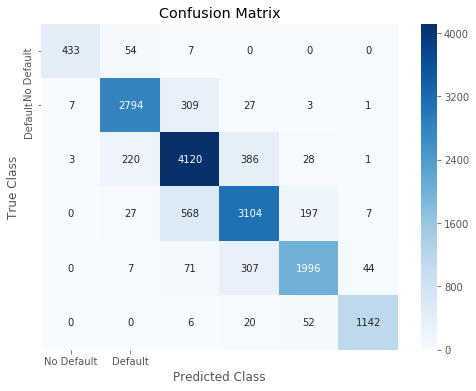

              precision    recall  f1-score   support

     class 0       0.98      0.88      0.92       494
     class 1       0.90      0.89      0.90      3141
     class 2       0.81      0.87      0.84      4758
     class 3       0.81      0.80      0.80      3903
     class 4       0.88      0.82      0.85      2425
     class 5       0.96      0.94      0.95      1220

   micro avg       0.85      0.85      0.85     15941
   macro avg       0.89      0.86      0.88     15941
weighted avg       0.85      0.85      0.85     15941



<function sklearn.metrics.ranking.auc(x, y, reorder='deprecated')>

In [85]:
logreg = LogisticRegression(class_weight=None,C=1,penalty='l2')
logreg.fit(transformed_training_matrix,test_y)

predictions_LogReg_prob = logreg.predict_proba(transformed_testing_matrix)
predictions_LogReg_prob = predictions_LogReg_prob[:,1]
predictions_LogReg_01 = logreg.predict(transformed_testing_matrix)

acc_logit = accuracy_score(test_y, predictions_LogReg_01)
print('Overall accuracy of Logistic Regression model:', acc_logit)

print_confusion_matrix(test_y, predictions_LogReg_01)